##  A 1-Hidden Layer Architecture (Broad Search - Parametric Study)
What is happening here?
    [1] A traditional ANN model
    [2] Contains two lines of code to find the rsquare
    [3] Includes lines of code on cross validation
    [4] Include the plot of the history curves

The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.

In [10]:
import pandas as pd
import numpy as np                                             
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.metrics import r2_score
import math
from matplotlib import pyplot as plt
import seaborn as sns
import shap

## Imports the data
bucklingdata = pd.read_csv("CBL_SimulationResults.csv", encoding='cp1252')
input_data = bucklingdata.drop(['Critical Buckling Load (N)','Critical Buckling Load (kN)'], axis=1)
output_data = bucklingdata['Critical Buckling Load (kN)']

## Data splitting
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data,
                                                   test_size=0.3,
                                                    shuffle=False,
                                                    stratify=None,
                                                    random_state=42)


# For validation number input and output data
val_no = round(0.2*y_train.size)
x_val = X_train[:val_no]
y_val = y_train[:val_no]

# Define model
def create_model1H(hp_layer_1):
    model = Sequential()
    model.add(Input(shape=(11,)))
    model.add(Dense(hp_layer_1, activation='relu'))
    model.add(Dense(1, activation='linear'))
    hp_learning_rate = 0.001
    model.compile(loss='mse',
                  optimizer=Adam(learning_rate=hp_learning_rate),
                  metrics=['mae'])
    return model

# Range of neurons to evaluate
neuron_min = 20
neuron_max = 100
neuron_step = 10
neuron_list = list(range(neuron_min, neuron_max + 1, neuron_step))

results = []

## Train your model for a number of epochs, with the .fit()
## Get the performance metrics for the network and the learning curves
for p1 in neuron_list:
    # Create model with current number of neurons
    model = create_model1H(p1)
    
    # Fit the model
    history = model.fit(X_train, y_train, epochs=150,
                        validation_data=(x_val, y_val), batch_size=32,
                        verbose=0)
    
    ## Get the performance metrics for the network and the learning curves
    # Evaluate the model
    trainmse, trainmae = model.evaluate(X_train, y_train, verbose=0)
    valmse, valmae = model.evaluate(x_val, y_val, verbose=0)
    testmse, testmae = model.evaluate(X_test, y_test, verbose=0)
    
    # Calculate R-squared
    train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    
    val_pred = model.predict(x_val)
    val_r2 = r2_score(y_val, val_pred)
    
    test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    
    # Store results
    results.append({
        'Neurons': p1,
        'Train R2': train_r2,
        'Val R2': val_r2,
        'Test R2': test_r2,
        'Train RMSE': math.sqrt(trainmse),
        'Val RMSE': math.sqrt(valmse),
        'Test RMSE': math.sqrt(testmse),
        'Train MAE': trainmae,
        'Val MAE': valmae,
        'Test MAE': testmae
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save results to Excel
results_df.to_excel("1HiddenLayer_VariousNeurons_Results_TestRun1.xlsx", index=False)

print("Results saved to 1HiddenLayer_VariousNeurons_Results.xlsx")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Results saved to 1HiddenLayer_VariousNeurons_Results.xlsx


## loss vs the number of epochs & MAE vs the number of epochs

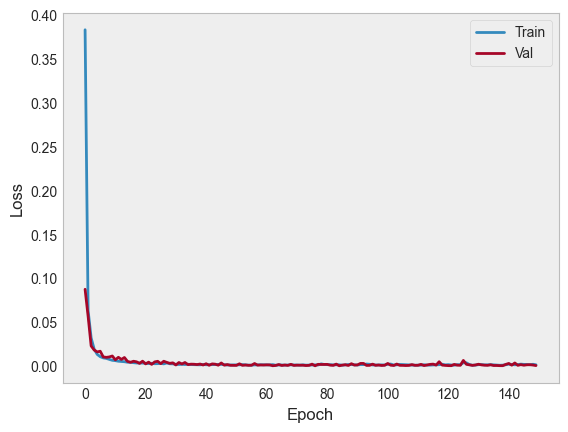

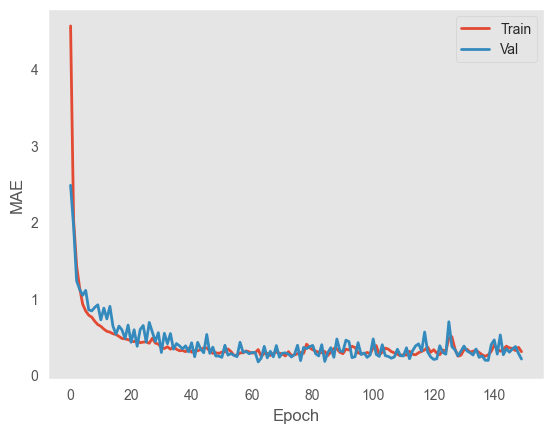

In [3]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.style.use('bmh')
  plt.grid(False)
  plt.plot(loss, linewidth=2)
  plt.plot(val_loss, linewidth=2)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

def plot_mae(mae,val_mae):
  plt.figure()
  plt.style.use('ggplot')
  plt.grid(False)
  plt.plot(mae, linewidth=2)
  plt.plot(val_mae, linewidth=2)
  plt.ylabel('MAE')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

train_loss = (np.array(history.history["loss"]))/100
val_loss = np.array((history.history["val_loss"]))/100

plot_loss(train_loss, val_loss)
plot_mae(history.history["mae"], history.history["val_mae"])

### Correlation between the actual output and the predicted output with the training dataset

[]

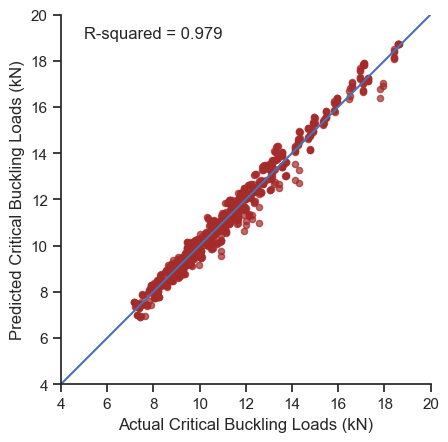

In [28]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
a = plt.axes(aspect='equal')
plt.scatter(y_train, train_pred, s = 20, alpha=0.7, c = 'brown')
plt.xlabel('Actual Critical Buckling Loads (kN)')
plt.ylabel('Predicted Critical Buckling Loads (kN)')
plt.annotate("R-squared = {:.3f}".format(r2_score(y_train, train_pred)), (5, 19))
plt.xlim([4, 20])
plt.ylim([4, 20])
plt.plot([4, 20], [4, 20])
plt.plot()
#plt.savefig('testing1.png')

### Correlation between the actual output and the predicted output with the testing dataset

[]

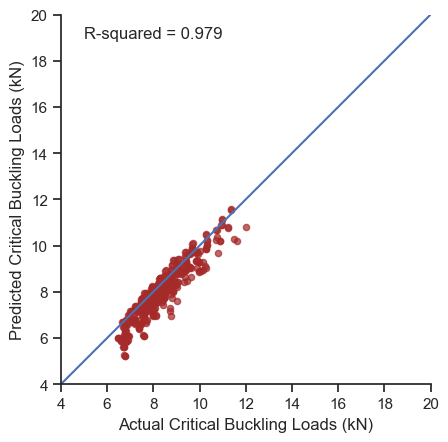

In [29]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_pred, s = 20, alpha=0.7, c = 'brown')
plt.xlabel('Actual Critical Buckling Loads (kN)')
plt.ylabel('Predicted Critical Buckling Loads (kN)')
plt.annotate("R-squared = {:.3f}".format(r2_score(y_train, train_pred)), (5, 19))
plt.xlim([4, 20])
plt.ylim([4, 20])
plt.plot([4, 20], [4, 20])
plt.plot()

## Variable importance SHAP plot

  0%|          | 0/389 [00:00<?, ?it/s]

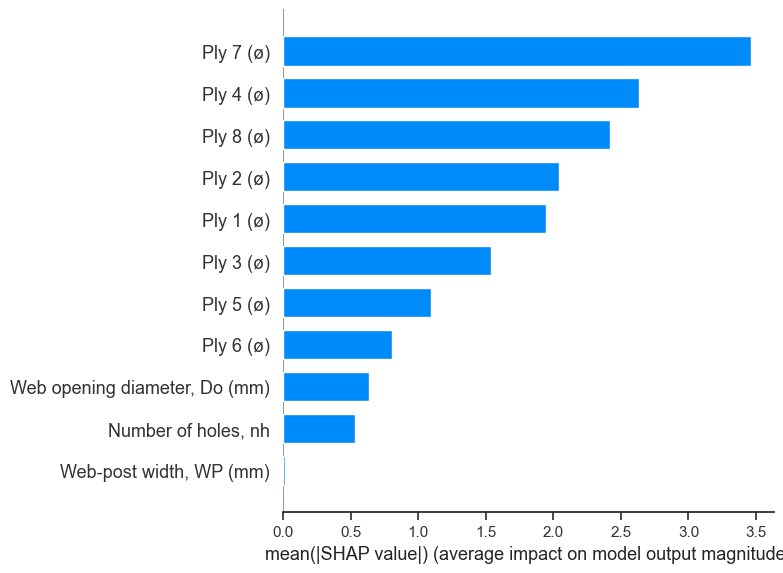

In [30]:
### VARIABLE IMPORTANCE
# See more here: https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/plots/bar.html
features = ["Number of holes, nh", "Web-post width, WP (mm)",  "Web opening diameter, Do (mm)",  "Ply 1 (ø)", "Ply 2 (ø)", "Ply 3 (ø)", "Ply 4 (ø)", "Ply 5 (ø)", "Ply 6 (ø)", "Ply 7 (ø)", "Ply 8 (ø)"]

# Create a SHAP explainer using KernelExplainer
explainer = shap.KernelExplainer(model, shap.sample(X_train, 100))

# Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)

# Reshape shap_values to remove the last dimension
shap_values_reshaped = shap_values.reshape(X_test.shape)  # Assuming X_test.shape is (389, 11)

shap.summary_plot(shap_values_reshaped, X_test, feature_names=features, plot_type="bar")
plt.show()